In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from pytrends.request import TrendReq

# Setup pytrend library and keywords define

In [25]:
pytrends=TrendReq(hl='en-US',tz=360)
keyword="cloud computing"

# Data request

In [26]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',geo='',gprop='')

In [ ]:
# Country wise interest

In [27]:
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword,ascending=False).head(15)

C:\Users\adity\AppData\Local\Temp\ipykernel_13808\2982895737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")


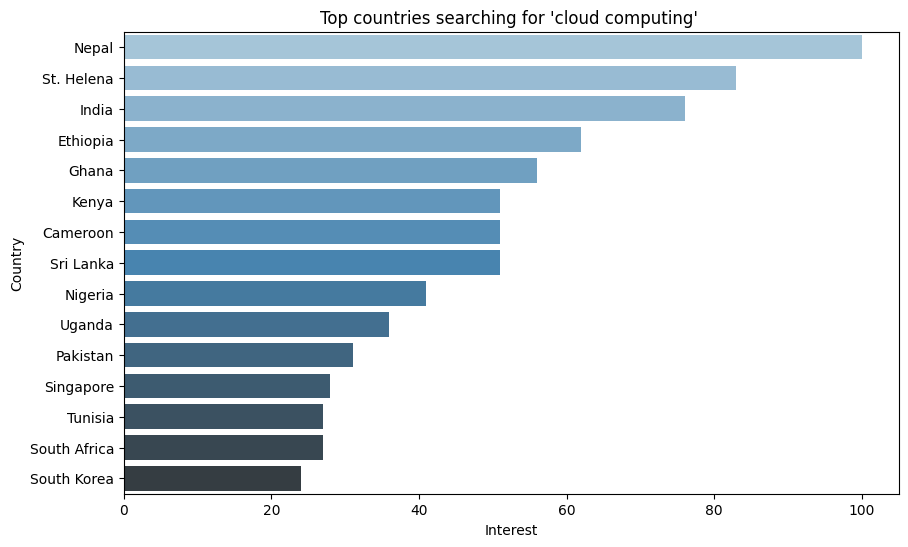

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")
plt.title(f"Top countries searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World map

C:\Users\adity\AppData\Local\Temp\ipykernel_13808\639169926.py:2: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig=px.choropleth(region_data,


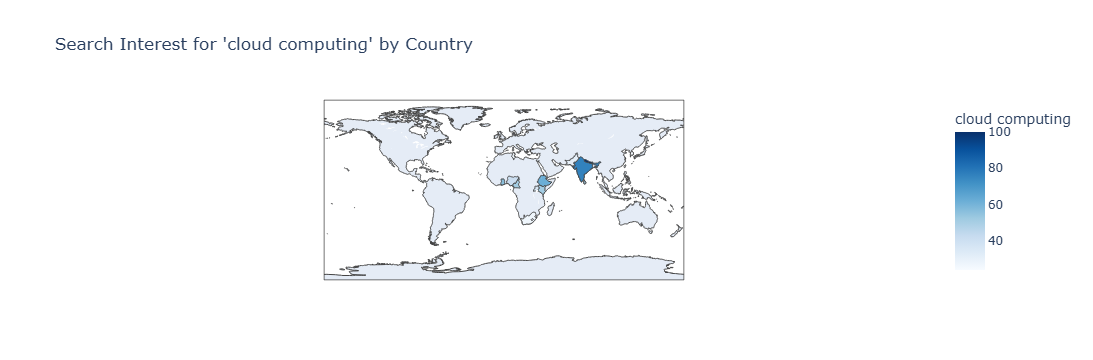

In [30]:
region_data=region_data.reset_index()
fig=px.choropleth(region_data,
                  locations='geoName',
                  locationmode='country names',
                  color=keyword,
                  title=f"Search Interest for '{keyword}' by Country",
                  color_continuous_scale='Blues')
fig.show()

# Time wise interest

In [54]:
time_df=pytrends.interest_over_time()

C:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



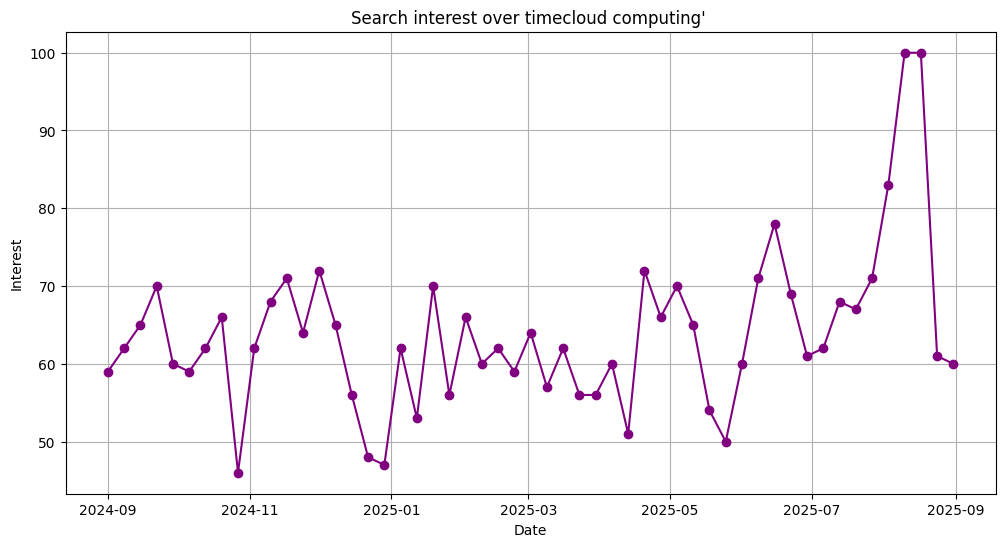

In [55]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='purple')
plt.title(f"Search interest over time{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()


# Multiple keyword compare

In [57]:
kw_list=["Cloud computing","Data science","Machine learning"]
pytrends.build_payload(kw_list,cat=0,timeframe='today 12-m',geo='',gprop='')

⚠️ Too many requests! 5 sec ruk rahe hain, fir retry karenge...


C:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



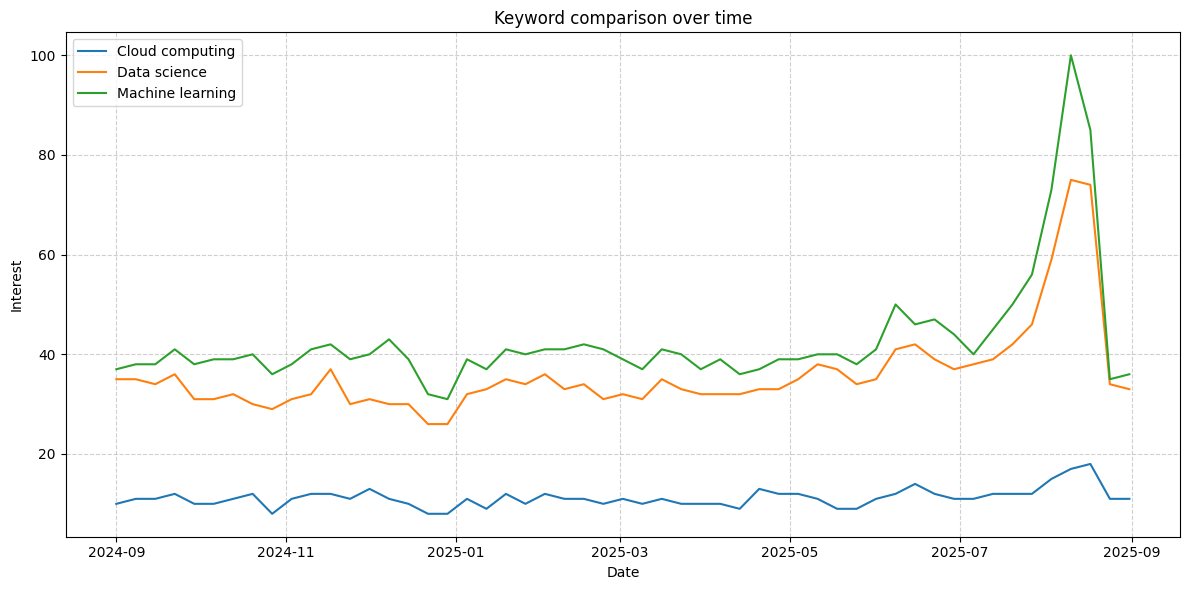

In [112]:
import time
import matplotlib.pyplot as plt
from pytrends.exceptions import TooManyRequestsError

# ✅ API call with retry
try:
    compare_df = pytrends.interest_over_time()
except TooManyRequestsError:
   
    time.sleep(5)
    compare_df = pytrends.interest_over_time()

# ✅ Plotting
if not compare_df.empty:
    compare_df = compare_df.reset_index()  

    plt.figure(figsize=(12,6))
    for kw in kw_list:
        plt.plot(compare_df['date'], compare_df[kw], label=kw)

    plt.title("Keyword comparison over time")
    plt.xlabel("Date")
    plt.ylabel("Interest")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Not get data from API.")
